In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import random
from datetime import datetime
import numpy as np
import re
import os

font_path = r'C:/Users/user/NanumFontSetup_TTF_ALL/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path, size=18).get_name()
rc('font',family=font_name)

# 1. Data Loading

In [2]:
os.listdir('../data/전처리 파일/표제부')

['2. 표제부 정제파일.csv',
 '3. 표제부 정제파일(위치).csv',
 '건물노후도',
 '연면적',
 '표제부 정제파일(위치 포함,not null).csv',
 '표제부 정제파일(위치 포함,null).csv',
 '표제부 정제파일.csv']

In [3]:
build_df = pd.read_csv('../data/전처리 파일/표제부/표제부 정제파일(위치 포함,null).csv')

In [4]:
building_data = pd.read_excel('../data/표제부 조회.xlsx')
building_data.head()

,대지위치,시군구코드,법정동코드,대지구분코드,번,지,관리건축물대장PK,대장구분코드,대장구분코드명,대장종류코드,...,에너지효율등급,에너지절감율,EPI점수,친환경건축물등급,친환경건축물인증점수,지능형건축물등급,지능형건축물인증점수,생성일자,내진설계적용여부,내진능력
0,인천광역시 부평구 부평동 10-1001번지,28237,10100,0,10,1001,28237-12633,2,집합,3,...,NaN,0.0,0,NaN,0,NaN,0,20200427,0.0,NaN
1,인천광역시 부평구 부평동 10-1002번지,28237,10100,0,10,1002,28237-12952,2,집합,3,...,NaN,0.0,0,NaN,0,NaN,0,20200427,0.0,NaN
2,인천광역시 부평구 부평동 10-1003번지,28237,10100,0,10,1003,28237-14406,2,집합,3,...,NaN,0.0,0,NaN,0,NaN,0,20200427,0.0,NaN
3,인천광역시 부평구 부평동 10-1004번지,28237,10100,0,10,1004,28237-10572,1,일반,2,...,NaN,0.0,0,NaN,0,NaN,0,20200427,0.0,NaN
4,인천광역시 부평구 부평동 10-1007번지,28237,10100,0,10,1007,28237-36680,1,일반,2,...,NaN,0.0,0,NaN,0,NaN,0,20171118,NaN,NaN


In [5]:
building_data[['대지위치','용적률(%)','주용도코드명','사용승인일']]

,대지위치,용적률(%),주용도코드명,사용승인일
0,인천광역시 부평구 부평동 10-1001번지,0.00,공동주택,19911227.0
1,인천광역시 부평구 부평동 10-1002번지,0.00,공동주택,19911227.0
2,인천광역시 부평구 부평동 10-1003번지,137.26,공동주택,19920929.0
3,인천광역시 부평구 부평동 10-1004번지,165.96,제1종근린생활시설,19911122.0
4,인천광역시 부평구 부평동 10-1007번지,157.78,제1종근린생활시설,19911122.0
...,...,...,...,...
30900,인천광역시 부평구 구산동 95-1번지,0.00,제1종근린생활시설,20121012.0
30901,인천광역시 부평구 구산동 산 6-2번지,0.00,교정및군사시설,20200331.0
30902,인천광역시 부평구 구산동 산 6-2번지,0.00,교정및군사시설,20200331.0
30903,인천광역시 부평구 구산동 산 6-2번지,9.68,교정및군사시설,20200331.0


## 1.1 필요데이터
- 시군구코드
- 법정동코드
- 도로명대지위치
- 건물명
- 연면적(㎡)
- 주용도코드
- 주용도코드명
- 사용승인일 => 건물노후도 측정을 위해서이다.

In [6]:
building_data.columns

Index(['대지위치', '시군구코드', '법정동코드', '대지구분코드', '번', '지', '관리건축물대장PK', '대장구분코드',
       '대장구분코드명', '대장종류코드', '대장종류코드명', '도로명대지위치', '건물명', '특수지명', '블록', '로트',
       '외필지수', '새주소도로코드', '새주소법정동코드', '새주소지상지하코드', '새주소본번', '새주소부번', '동명칭',
       '주부속구분코드', '주부속구분코드명', '대지면적(㎡)', '건축면적(㎡)', '건폐율(%)', '연면적(㎡)',
       '용적률산정연면적(㎡)', '용적률(%)', '구조코드', '구조코드명', '기타구조', '주용도코드', '주용도코드명',
       '기타용도', '지붕코드', '지붕코드명', '기타지붕', '세대수(세대)', '가구수(가구)', '높이(m)', '지상층수',
       '지하층수', '승용승강기수', '비상용승강기수', '부속건축물수', '부속건축물면적(㎡)', '총동연면적(㎡)',
       '옥내기계식대수(대)', '옥내기계식면적(㎡)', '옥외기계식대수(대)', '옥외기계식면적(㎡)', '옥내자주식대수(대)',
       '옥내자주식면적(㎡)', '옥외자주식대수(대)', '옥외자주식면적(㎡)', '허가일', '착공일', '사용승인일',
       '허가번호년', '허가번호기관코드', '허가번호기관코드명', '허가번호구분코드', '허가번호구분코드명', '호수(호)',
       '에너지효율등급', '에너지절감율', 'EPI점수', '친환경건축물등급', '친환경건축물인증점수', '지능형건축물등급',
       '지능형건축물인증점수', '생성일자', '내진설계적용여부', '내진능력'],
      dtype='object')

In [7]:
essential_col = ['대지위치','건물명','연면적(㎡)','주용도코드','주용도코드명','사용승인일']
bd_use_data = building_data[essential_col]
bd_use_data.head()

,대지위치,건물명,연면적(㎡),주용도코드,주용도코드명,사용승인일
0,인천광역시 부평구 부평동 10-1001번지,대성빌라,657.11,02000,공동주택,19911227.0
1,인천광역시 부평구 부평동 10-1002번지,대성타운,657.61,02000,공동주택,19911227.0
2,인천광역시 부평구 부평동 10-1003번지,대성빌라,657.61,02000,공동주택,19920929.0
3,인천광역시 부평구 부평동 10-1004번지,NaN,488.10,03000,제1종근린생활시설,19911122.0
4,인천광역시 부평구 부평동 10-1007번지,NaN,386.88,03000,제1종근린생활시설,19911122.0


# 2. Column명 변경
* 연면적(㎡) => 연면적

In [8]:
bd_use_data = bd_use_data.rename(columns={'건축면적(㎡)':'건축면적','대지면적(㎡)':'대지면적','건폐율(%)':'건폐율'
                            ,'연면적(㎡)':'연면적'})

## 2.1 필요한 Row
- 공동주택
- 제1종근린생활시설
- 제2종근린생활시설
- 단독주택
- 근린생활시설
- 업무시설

In [9]:
bd_use_data['주용도코드명'].unique()

array(['공동주택', '제1종근린생활시설', '제2종근린생활시설', '단독주택', '노유자시설', '종교시설',
       '교육연구시설', '위험물저장및처리시설', '자동차관련시설', '공장', '근린생활시설', '업무시설', '창고시설',
       '의료시설', '판매시설', '판매및영업시설', '숙박시설', '위락시설', '교육연구및복지시설', '방송통신시설',
       '운수시설', '운동시설', '묘지관련시설', '분뇨.쓰레기처리시설', '동.식물관련시설', '문화및집회시설',
       '관광휴게시설', '교정및군사시설', '공공용시설', '수련시설'], dtype=object)

In [10]:
# 상업용 건물
commertial = ['제1종근린생활시설','제2종근린생활시설','근린생활시설','업무시설','관광휴게시설','의료시설'
              ,'판매시설','판매및영업시설'] 

# 주거용 건물
residential = ['공동주택','단독주택'] # 공동주택이 다세대주택이겠지?

# 추출해야할 row list 생성
extract_row = commertial + residential

# 필요 data 추출
use_data = bd_use_data[bd_use_data['주용도코드명'].isin(extract_row)]
display(use_data.head())
display(len(use_data))

,대지위치,건물명,연면적,주용도코드,주용도코드명,사용승인일
0,인천광역시 부평구 부평동 10-1001번지,대성빌라,657.11,02000,공동주택,19911227.0
1,인천광역시 부평구 부평동 10-1002번지,대성타운,657.61,02000,공동주택,19911227.0
2,인천광역시 부평구 부평동 10-1003번지,대성빌라,657.61,02000,공동주택,19920929.0
3,인천광역시 부평구 부평동 10-1004번지,NaN,488.10,03000,제1종근린생활시설,19911122.0
4,인천광역시 부평구 부평동 10-1007번지,NaN,386.88,03000,제1종근린생활시설,19911122.0


27156

In [11]:
display(use_data['주용도코드명'].unique())
display(len(use_data))

array(['공동주택', '제1종근린생활시설', '제2종근린생활시설', '단독주택', '근린생활시설', '업무시설', '의료시설',
       '판매시설', '판매및영업시설', '관광휴게시설'], dtype=object)

27156

In [12]:
use_data['사용승인일'].agg(['min','max'])

min        1945.0
max    20210830.0
Name: 사용승인일, dtype: float64

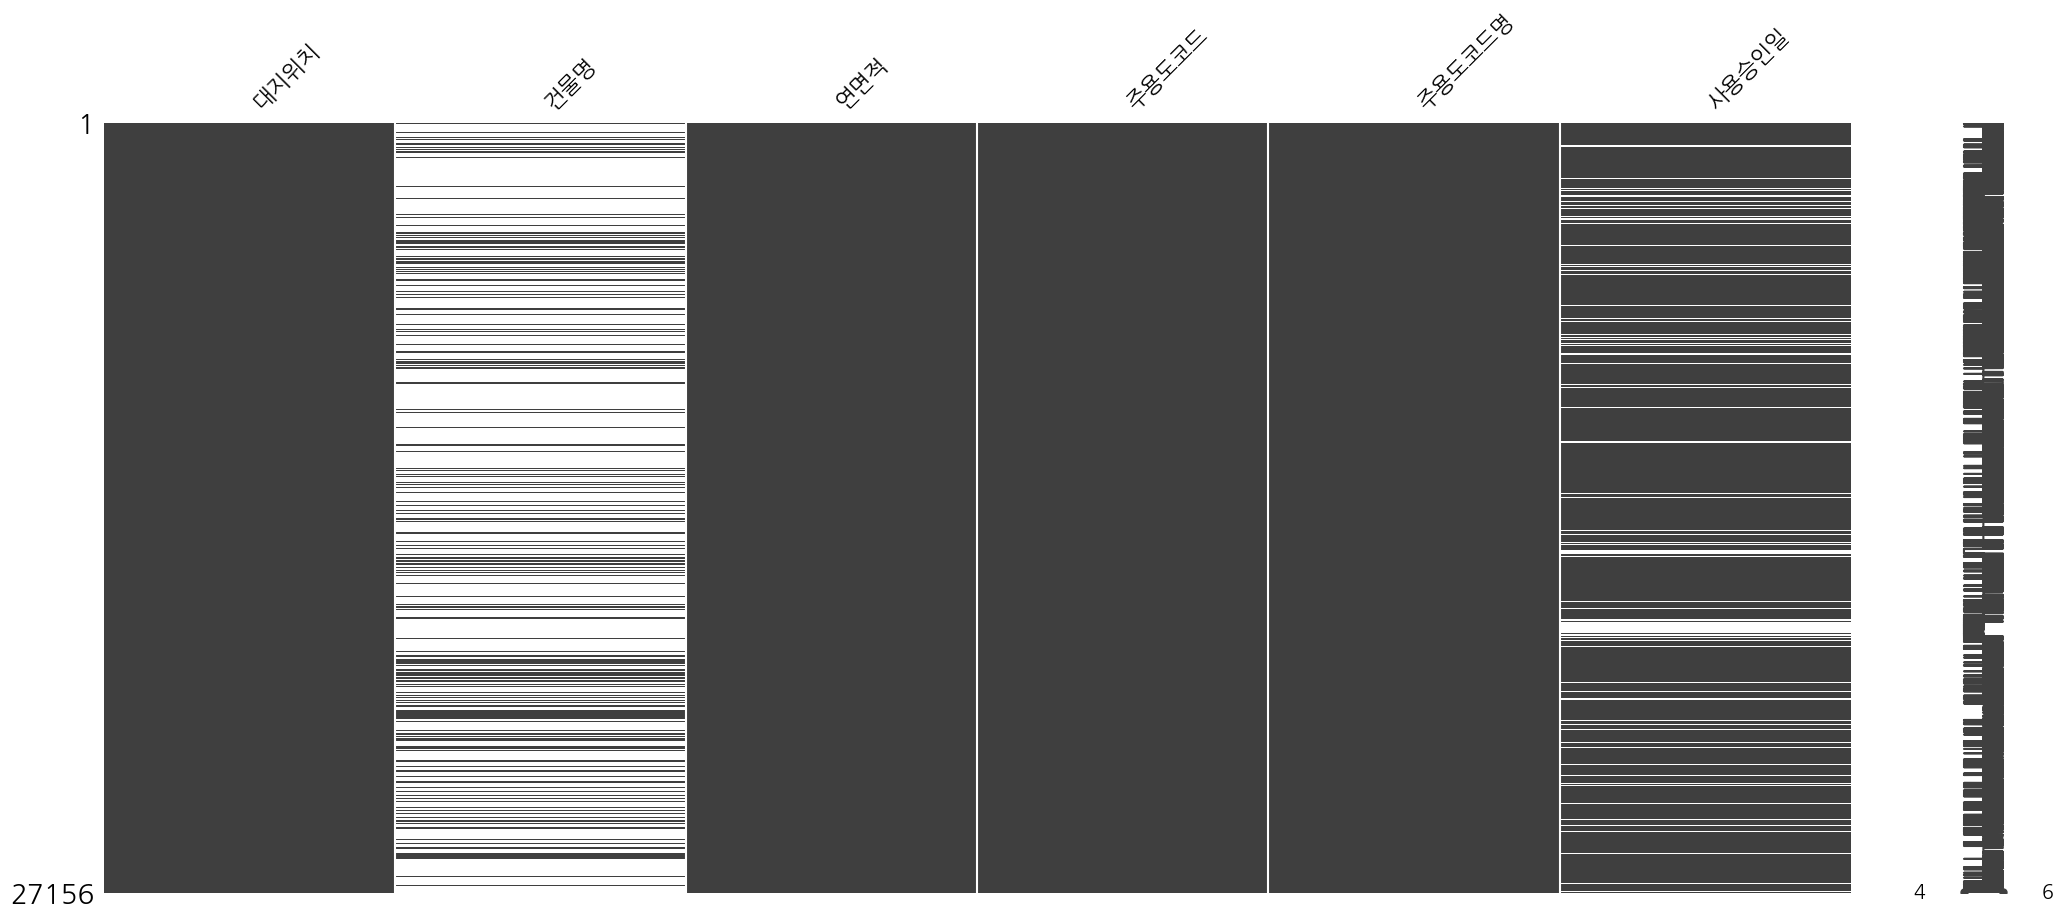

In [13]:
msno.matrix(use_data)
plt.show()

In [14]:
use_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27156 entries, 0 to 30904
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대지위치    27156 non-null  object 
 1   건물명     6629 non-null   object 
 2   연면적     27156 non-null  float64
 3   주용도코드   27156 non-null  object 
 4   주용도코드명  27156 non-null  object 
 5   사용승인일   23919 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.5+ MB


건물명에 많은 null값이 존재한다. 하지만 건물의 용도, 다양한 지수, 위치 정도면 알면되기 때문에 딱히 신경쓰지 않아도 될것 같다.

In [15]:
use_data.isnull().sum()

대지위치          0
건물명       20527
연면적           0
주용도코드         0
주용도코드명        0
사용승인일      3237
dtype: int64

In [16]:
use_data.duplicated(list(use_data)).sum()

981

In [17]:
use_data.duplicated('대지위치').sum()

7365

In [18]:
use_data.loc[:,'대지위치'] = [add.strip() for add in use_data['대지위치'].values]
use_data['대지위치'].head()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


0    인천광역시 부평구 부평동 10-1001번지
1    인천광역시 부평구 부평동 10-1002번지
2    인천광역시 부평구 부평동 10-1003번지
3    인천광역시 부평구 부평동 10-1004번지
4    인천광역시 부평구 부평동 10-1007번지
Name: 대지위치, dtype: object

In [19]:
# 중복되는 row들의 주용도코드명을 담는다.
main_use_code_name= use_data[use_data.duplicated('대지위치')]['주용도코드명'].unique()
print(main_use_code_name)

['제1종근린생활시설' '단독주택' '공동주택' '제2종근린생활시설' '판매시설' '판매및영업시설' '업무시설' '근린생활시설'
 '의료시설' '관광휴게시설']


In [20]:
# 중복되는 데이터들의 주용도코드명이 어떤 분포로 있는지 살펴본다.

# 도로명대지위치 기준으로 몇개의 row가 중복되는가?
condition1 = use_data.duplicated('대지위치')

for name in main_use_code_name:
    condition2 = (use_data['주용도코드명'] == name)
    count = len(use_data[condition1 & condition2])
    print(f'{name} : {count}개')

제1종근린생활시설 : 511개
단독주택 : 4137개
공동주택 : 2422개
제2종근린생활시설 : 228개
판매시설 : 24개
판매및영업시설 : 2개
업무시설 : 17개
근린생활시설 : 8개
의료시설 : 14개
관광휴게시설 : 2개


In [21]:
use_data[use_data['대지위치'].apply(lambda x : '일신동' in x)]

,대지위치,건물명,연면적,주용도코드,주용도코드명,사용승인일
29210,인천광역시 부평구 일신동 1-1번지,NaN,493.50,03000,제1종근린생활시설,20060714.0
29211,인천광역시 부평구 일신동 1-2번지,NaN,791.91,04000,제2종근린생활시설,20060313.0
29212,인천광역시 부평구 일신동 1-5번지,NaN,32.40,01000,단독주택,NaN
29213,인천광역시 부평구 일신동 100-4번지,NaN,384.00,04000,제2종근린생활시설,19931023.0
29214,인천광역시 부평구 일신동 100-5번지,NaN,167.82,01000,단독주택,19931012.0
...,...,...,...,...,...,...
30089,인천광역시 부평구 일신동 98-8번지,NaN,212.80,04000,제2종근린생활시설,20030116.0
30090,인천광역시 부평구 일신동 99-1번지,NaN,42.75,01000,단독주택,19830316.0
30091,인천광역시 부평구 일신동 99-7번지,NaN,1520.19,04000,제2종근린생활시설,19981231.0
30092,인천광역시 부평구 일신동 99번지,NaN,43.64,01000,단독주택,19740918.0


In [22]:
con2 = (use_data['주용도코드명']==main_use_code_name[8])
space_add = (use_data['대지위치'] == '')
share_house = use_data[condition1 & ~space_add]
add_list = share_house['대지위치'].unique()

In [23]:
idx = random.randint(0,len(share_house)-1)
address = share_house.iloc[idx,0]
share_house[share_house['대지위치'] == address].sort_values(by='연면적')

,대지위치,건물명,연면적,주용도코드,주용도코드명,사용승인일
25969,인천광역시 부평구 부개동 120-287번지,NaN,135.14,01000,단독주택,19780206.0


In [24]:
len(use_data)

27156

# 3. 사용승인일

In [52]:
# 중복 데이터 제거
admit_use_date_data = use_data.drop_duplicates(['대지위치','주용도코드명','사용승인일'],keep='first')
admit_use_date_data.head()

,대지위치,건물명,연면적,주용도코드,주용도코드명,사용승인일
0,인천광역시 부평구 부평동 10-1001번지,대성빌라,657.11,02000,공동주택,19911227.0
1,인천광역시 부평구 부평동 10-1002번지,대성타운,657.61,02000,공동주택,19911227.0
2,인천광역시 부평구 부평동 10-1003번지,대성빌라,657.61,02000,공동주택,19920929.0
3,인천광역시 부평구 부평동 10-1004번지,NaN,488.10,03000,제1종근린생활시설,19911122.0
4,인천광역시 부평구 부평동 10-1007번지,NaN,386.88,03000,제1종근린생활시설,19911122.0


In [53]:
admit_use_date_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20886 entries, 0 to 30904
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대지위치    20886 non-null  object 
 1   건물명     4679 non-null   object 
 2   연면적     20886 non-null  float64
 3   주용도코드   20886 non-null  object 
 4   주용도코드명  20886 non-null  object 
 5   사용승인일   19099 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.1+ MB


In [54]:
admit_use_date_data.isnull().sum()

대지위치          0
건물명       16207
연면적           0
주용도코드         0
주용도코드명        0
사용승인일      1787
dtype: int64

In [28]:
admit_use_date_data = admit_use_date_data[admit_use_date_data['사용승인일'].notna()]
admit_use_date_data.reset_index(inplace=True,drop=True)
admit_use_date_data

,대지위치,건물명,연면적,주용도코드,주용도코드명,사용승인일
0,인천광역시 부평구 부평동 10-1001번지,대성빌라,657.11,02000,공동주택,19911227.0
1,인천광역시 부평구 부평동 10-1002번지,대성타운,657.61,02000,공동주택,19911227.0
2,인천광역시 부평구 부평동 10-1003번지,대성빌라,657.61,02000,공동주택,19920929.0
3,인천광역시 부평구 부평동 10-1004번지,NaN,488.10,03000,제1종근린생활시설,19911122.0
4,인천광역시 부평구 부평동 10-1007번지,NaN,386.88,03000,제1종근린생활시설,19911122.0
...,...,...,...,...,...,...
19094,인천광역시 부평구 구산동 9-5번지,NaN,1247.41,01000,단독주택,19800818.0
19095,인천광역시 부평구 구산동 9-5번지,NaN,35.87,01000,단독주택,19890406.0
19096,인천광역시 부평구 구산동 93-1번지,보보주유소,84.33,04000,제2종근린생활시설,20060705.0
19097,인천광역시 부평구 구산동 95-1번지,NaN,951.44,03000,제1종근린생활시설,20121012.0


In [29]:
# int형으로 변환
admit_use_date_data['사용승인일'] = admit_use_date_data['사용승인일'].astype(int).astype(str)

In [30]:
test_data = admit_use_date_data.copy()

In [31]:
def check_admit_use(regx):
    # 사용승인일이 해당 digit에 부합하지 않는 row들을 반환한다.
    
    p = re.compile(regx)
    four_to_eight_con = test_data['사용승인일'].apply(lambda x : p.match(str(x)) != None)
    result = test_data[four_to_eight_con]
    return result

In [32]:
# 8자리가 아닌 데이터 추출해서 8자리로 만들어줌
def make_digit_eight(digit):
    regx = r'^\d{'+str(digit)+r'}$'
    idx = check_admit_use(regx).index
    
    for i in idx:
        test_data.iloc[i,5] = str(test_data.iloc[i,5])+int((8-digit)/2)*'01'

    result = check_admit_use(regx)
    print(f'남은 {digit} 승인일 : {len(result)}')

for digit in [4,6]: 
    make_digit_eight(digit)

# datetime형으로 변환

# admit_use_date_data['사용승인일'] = admit_use_date_data['사용승인일'].apply(lambda x : datetime.strptime(str(x),'%Y%m%d'))

    

남은 4 승인일 : 0
남은 6 승인일 : 0


In [33]:
reg = '^\d{7}$'
check_admit_use(reg)

,대지위치,건물명,연면적,주용도코드,주용도코드명,사용승인일
7647,인천광역시 부평구 십정동 282-1번지,NaN,1024.74,02000,공동주택,1983121


In [34]:
reg = '^\d{7}$'
four_to_eight = check_admit_use(reg).index
test_data.iloc[four_to_eight[0],5] = '19831201'

In [35]:
reg = '^\d{8}$'
test_data[check_admit_use(reg).index != test_data.index]
# 8자리가 아닌 데이터는 없다.

,대지위치,건물명,연면적,주용도코드,주용도코드명,사용승인일


In [36]:
reg = '^\d{6}00$'
index = check_admit_use(reg).index

for i in index:
    date = str(test_data.iloc[i,5])
    test_data.iloc[i,5] = date.replace(date,date[:6]+'01')

len(check_admit_use(reg))

0

In [37]:
for idx, data in test_data.iterrows():
    try:
        test_data.iloc[idx,5] = datetime.strptime(str(test_data.iloc[idx,5]),'%Y%m%d')
    except:
        continue

In [38]:
# 해당 월에 날짜가 없는 경우.
test_data[~(test_data['사용승인일'].apply(lambda x : isinstance(x,datetime)))]

,대지위치,건물명,연면적,주용도코드,주용도코드명,사용승인일
5085,인천광역시 부평구 부평동 70-5번지,부평동아아파트,17768.82,02000,공동주택,19890631
5239,인천광역시 부평구 부평동 736-7번지,NaN,199.32,01000,단독주택,19993121
15302,인천광역시 부평구 갈산동 367번지,NaN,1431.74,03000,제1종근린생활시설,19921330


In [39]:
idx = test_data[~(test_data['사용승인일'].apply(lambda x : isinstance(x,datetime)))].index

edit_dict = {'19890631':'19890630','19993121':'19990121','19921330':'19921230'}

for i in idx:
    date = edit_dict[str(test_data.iloc[i,5])] # 새로운 값으로 변경
    test_data.iloc[i,5] = datetime.strptime(date,'%Y%m%d')

len(test_data[~(test_data['사용승인일'].apply(lambda x : isinstance(x,datetime)))])

0

In [40]:
test_data['사용승인일'] = pd.to_datetime(test_data['사용승인일'])
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19099 entries, 0 to 19098
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   대지위치    19099 non-null  object        
 1   건물명     4641 non-null   object        
 2   연면적     19099 non-null  float64       
 3   주용도코드   19099 non-null  object        
 4   주용도코드명  19099 non-null  object        
 5   사용승인일   19099 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 895.4+ KB


In [41]:
# 2020-01-01 이후의 데이터 추출
over_2019_index = test_data[test_data['사용승인일'] >= '2020-01-01'].index

In [42]:
# 데이터 추출후 제거
result = test_data.drop(over_2019_index,axis=0).reset_index(drop=True)

In [43]:
result

,대지위치,건물명,연면적,주용도코드,주용도코드명,사용승인일
0,인천광역시 부평구 부평동 10-1001번지,대성빌라,657.11,02000,공동주택,1991-12-27
1,인천광역시 부평구 부평동 10-1002번지,대성타운,657.61,02000,공동주택,1991-12-27
2,인천광역시 부평구 부평동 10-1003번지,대성빌라,657.61,02000,공동주택,1992-09-29
3,인천광역시 부평구 부평동 10-1004번지,NaN,488.10,03000,제1종근린생활시설,1991-11-22
4,인천광역시 부평구 부평동 10-1007번지,NaN,386.88,03000,제1종근린생활시설,1991-11-22
...,...,...,...,...,...,...
18948,인천광역시 부평구 구산동 9-5번지,NaN,1247.41,01000,단독주택,1980-08-18
18949,인천광역시 부평구 구산동 9-5번지,NaN,35.87,01000,단독주택,1989-04-06
18950,인천광역시 부평구 구산동 93-1번지,보보주유소,84.33,04000,제2종근린생활시설,2006-07-05
18951,인천광역시 부평구 구산동 95-1번지,NaN,951.44,03000,제1종근린생활시설,2012-10-12


In [44]:
building_old = []
now = datetime.strptime('202001','%Y%m')
# temp_date = result['사용승인일'].apply(lambda x : )

for idx, row in result.iterrows():
    target_date = result.iloc[idx,5]
    gap = now-target_date
    building_old.append(gap)
    
result['건물노후도'] = (pd.Series(building_old).dt.days / 31).astype(int)
# result['건물노후도'] = result['건물노후도']
result.head()

,대지위치,건물명,연면적,주용도코드,주용도코드명,사용승인일,건물노후도
0,인천광역시 부평구 부평동 10-1001번지,대성빌라,657.11,02000,공동주택,1991-12-27,330
1,인천광역시 부평구 부평동 10-1002번지,대성타운,657.61,02000,공동주택,1991-12-27,330
2,인천광역시 부평구 부평동 10-1003번지,대성빌라,657.61,02000,공동주택,1992-09-29,321
3,인천광역시 부평구 부평동 10-1004번지,NaN,488.10,03000,제1종근린생활시설,1991-11-22,331
4,인천광역시 부평구 부평동 10-1007번지,NaN,386.88,03000,제1종근린생활시설,1991-11-22,331


In [45]:
result['건물노후도'].min()

0

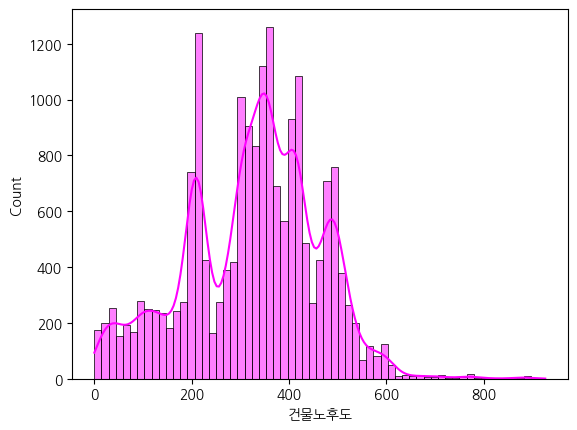

In [46]:
sns.histplot(result,x='건물노후도',kde=True,color='magenta')
plt.show()

In [47]:
result['건물노후도'].describe()

count    18953.000000
mean       325.493906
std        135.190603
min          0.000000
25%        219.000000
50%        342.000000
75%        416.000000
max        926.000000
Name: 건물노후도, dtype: float64

In [48]:
store_path = '../data/전처리 파일/표제부/건물노후도'
result.to_csv(os.path.join(store_path,'주소별 건물노후도.csv'),index=False)

# 4. 연면적
- 각 건물별로 연면적을 구했으며, 지오코딩을 통해서 변환해야함.

In [49]:
area = result.groupby(['대지위치','주용도코드명'])['연면적'].sum().to_frame().reset_index()
area.shape

(18634, 3)

In [50]:
store_path = os.path.join('..\\data\\전처리 파일\\표제부\\연면적')
area.to_csv(os.path.join(store_path,'주소별 연면적.csv'),index=False)

use_data.to_csv('..\\data\\전처리 파일\\표제부\\표제부 정제파일.csv',index=False)